In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
df = pd.read_csv('TaxiFare.csv')

In [55]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [57]:
#This column is not unique because it uses the minutes and seconds at the time of pickup which as you can see are not unique
df.unique_id.value_counts()

26:00.0    457
33:00.0    439
11:00.0    436
32:00.0    429
20:00.0    424
          ... 
52:39.0      1
40:52.0      1
04:28.0      1
30:15.0      1
02:34.0      1
Name: unique_id, Length: 3597, dtype: int64

In [101]:
X = df.iloc[:,2:]
y = df.iloc[:,1]

In [102]:
#Took the longitudes and latitudes difference because difference(Distance) is the key evaluater here
X['Longitude_difference'] = X['longitude_of_pickup'] - X['longitude_of_dropoff']

In [103]:
X['Longitude_difference'] = X['Longitude_difference'].abs()

In [104]:
X.drop(['longitude_of_dropoff', 'longitude_of_pickup'], axis = 1, inplace = True)

In [105]:
X['Latitude_difference'] = X['latitude_of_pickup'] - X['latitude_of_dropoff']

In [106]:
X['Latitude_difference'] = X['Latitude_difference'].abs()

In [107]:
X.drop(['latitude_of_dropoff', 'latitude_of_pickup'], axis = 1, inplace = True)

In [126]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   no_of_passenger       50000 non-null  int64  
 1   Longitude_difference  50000 non-null  float64
 2   Latitude_difference   50000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 1.1 MB


<AxesSubplot:xlabel='Longitude_difference', ylabel='Count'>

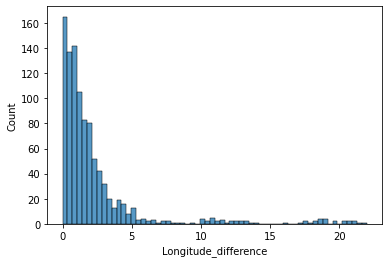

In [109]:
#Took a random sample of 1000 because 50000 rows were taking a lot of time 
sns.histplot(X['Longitude_difference'].sample(1000)* 100)

In [110]:
#multiplying with 100 to easily visualize the distribution of data
X['Longitude_difference'] = X['Longitude_difference'] * 100

In [111]:
X['Latitude_difference'] = X['Latitude_difference'] * 100

<AxesSubplot:xlabel='Latitude_difference', ylabel='Count'>

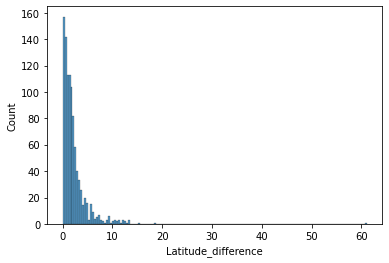

In [112]:
sns.histplot(X['Latitude_difference'].sample(1000))

In [113]:
X.describe()

,no_of_passenger,Longitude_difference,Latitude_difference
count,50000.000000,50000.000000,50000.000000
mean,1.667840,15.143318,9.777625
std,1.289195,307.704938,232.636502
min,0.000000,0.000000,0.000000
25%,1.000000,0.577775,0.660175
50%,1.000000,1.252600,1.392850
75%,2.000000,2.396675,2.708550
max,6.000000,7401.491700,36030.440500


In [114]:
#Looking for outliers

In [115]:
X[X['Longitude_difference'] > X['Longitude_difference'].std() * 2.5].count()

date_time_of_pickup     88
no_of_passenger         88
Longitude_difference    88
Latitude_difference     88
dtype: int64

In [116]:
deviation_cap = X['Longitude_difference'].std() * 2.5
X['Longitude_difference'] = X['Longitude_difference'].clip(upper = deviation_cap)

In [117]:
deviation_cap = X['Latitude_difference'].std() * 2.5
X['Latitude_difference'] = X['Latitude_difference'].clip(upper = deviation_cap)

<AxesSubplot:xlabel='Latitude_difference', ylabel='Count'>

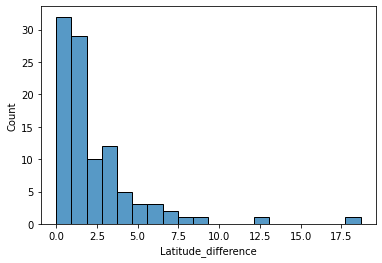

In [118]:
sns.histplot(X['Latitude_difference'].sample(100))

In [119]:
#time of pickup will not affect the amount, therefore dropping it
X.drop('date_time_of_pickup', axis = 1, inplace = True)

In [121]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   no_of_passenger       50000 non-null  int64  
 1   Longitude_difference  50000 non-null  float64
 2   Latitude_difference   50000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 1.1 MB


### Model

In [175]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 4)

In [176]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(n_estimators = 50, criterion = 'mse', random_state = 1)
regr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=1)

In [177]:
RandomForestRegressor?

In [178]:
y_pred = regr.predict(X_test)

In [179]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.459137289572305
Mean Squared Error: 21.43187172241162
Root Mean Squared Error: 4.629456957615182


In [180]:
print("Accuracy", metrics.r2_score(y_test, y_pred) * 100)

Accuracy 76.34884081668719


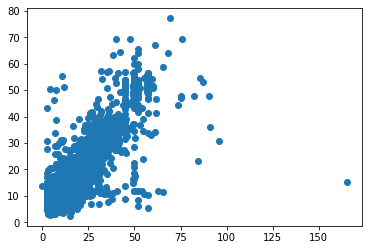

In [181]:
plt.scatter(y_test, y_pred)

In [182]:
from sklearn.model_selection import GridSearchCV

In [183]:
pargrid_rf = {'n_estimators': [60, 70, 80, 90, 100, 120, 150, 200],
                  'max_features': [2,4,9]}

gscv_rf = GridSearchCV(estimator = RandomForestRegressor(), 
                        param_grid = pargrid_rf, 
                        cv = 5,
                        verbose = True, 
                        n_jobs = -1)

gscv_results = gscv_rf.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  1.6min finished


In [184]:
gscv_results.best_params_

{'max_features': 2, 'n_estimators': 150}

In [190]:
regr = RandomForestRegressor(n_estimators = 150, max_features = 2,criterion = 'mse', random_state = 2)
regr.fit(X_train, y_train)

RandomForestRegressor(max_features=2, n_estimators=150, random_state=2)

In [191]:
y_pred = regr.predict(X_test)

In [192]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.4181200114643913
Mean Squared Error: 20.903561975685072
Root Mean Squared Error: 4.572041335736705


In [193]:
print("Accuracy", metrics.r2_score(y_test, y_pred) * 100)

Accuracy 76.93185746029927


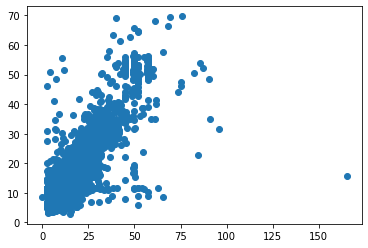

In [194]:
plt.scatter(y_test, y_pred)

#### Before Hyper tuning
<p>Mean Absolute Error: 2.459137289572305</p>
<p>Mean Squared Error: 21.43187172241162</p>
<p>Root Mean Squared Error: 4.629456957615182</p>
<p>Accuracy 76.34884081668719</p>

#### After Hyperparametric tuning 
<p>Mean Absolute Error: 2.4181200114643913</p>
<p>Mean Squared Error: 20.903561975685072</p>
<p>Root Mean Squared Error: 4.572041335736705</p>
<p>Accuracy 76.93185746029927</p>